# Data

In [1]:
import matplotlib.pyplot as plt
import arviz as az

from lqg.io import load_tracking_data

data, blob_widths = load_tracking_data(data_path="../data/")
data.shape

(6, 20, 1068, 2)

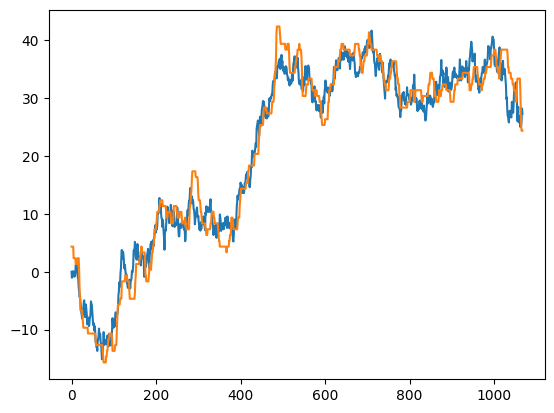

In [2]:
plt.plot(data[0, 0, :, 0])
plt.plot(data[0, 0, :, 1])

In [5]:
seed = 1
models = ["BoundedActor", "SubjectiveActor"]

results = {model_name: az.from_netcdf(f"../data/processed/{model_name}-{seed}.nc") for model_name in models}

           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
sigma_0   8.544  0.273   8.032    9.056      0.002    0.001   22415.0   
sigma_1   9.726  0.337   9.104   10.373      0.002    0.002   21472.0   
sigma_2  11.812  0.360  11.147   12.502      0.002    0.002   20882.0   
sigma_3  19.854  0.918  18.193   21.622      0.006    0.004   23440.0   
sigma_4  28.512  1.516  25.677   31.347      0.011    0.008   19540.0   
sigma_5  51.588  3.234  45.550   57.624      0.024    0.017   18498.0   

         ess_tail  r_hat  
sigma_0   14534.0    1.0  
sigma_1   15742.0    1.0  
sigma_2   14644.0    1.0  
sigma_3   15436.0    1.0  
sigma_4   14415.0    1.0  
sigma_5   16077.0    1.0  
           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
sigma_0  11.844  0.390  11.126   12.590      0.003    0.002   17120.0   
sigma_1  12.188  0.419  11.396   12.956      0.003    0.002   19297.0   
sigma_2  14.951  0.548  13.965   16.028      0.004    0.003   18766.0   
sigma_3

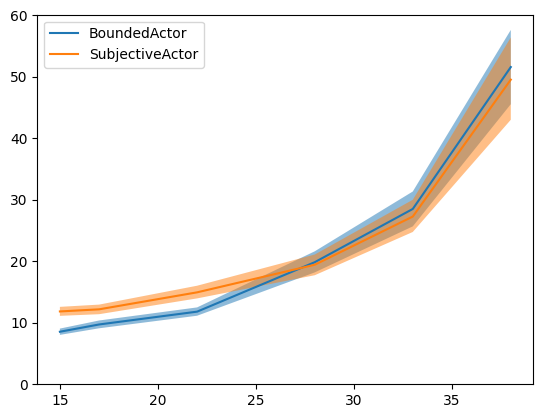

In [6]:
for model_name, inference_data in sorted(results.items()):
    summary = az.summary(inference_data.posterior, var_names=[f"sigma_{i}" for i in range(6)])
    print(summary)

    plt.plot(blob_widths, summary["mean"], label=model_name)
    plt.fill_between(blob_widths, summary["hdi_3%"], summary["hdi_97%"], alpha=0.5)
    plt.ylim(0, )
plt.legend()